<a href="https://colab.research.google.com/github/harshavardhangadila/Basic-Neural-Network-Using-Numpy-Keras-Pytorch-and-Jax/blob/main/6)_TensorFlow_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TensorFlow Neural Network using Sequential API

In [1]:
# Step 1: Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

In [2]:
# Step 2: Generate 3-Variable Synthetic Nonlinear Data
def generate_data(n_samples=1000):
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    x3 = np.random.uniform(-5, 5, n_samples)
    y = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2) + np.random.normal(0, 0.2, n_samples)
    X = np.column_stack((x1, x2, x3)).astype(np.float32)
    y = y.reshape(-1, 1).astype(np.float32)
    return X, y

X_train, y_train = generate_data()

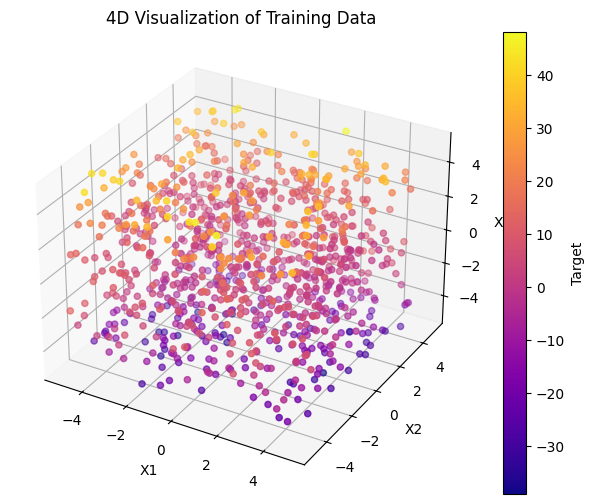

In [3]:
# Step 3: Visualize Data (4D: x1, x2, x3, y)
def plot_4d(X, y):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y[:, 0], cmap='plasma')
    plt.colorbar(scatter, label='Target')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title("4D Visualization of Training Data")
    plt.show()

plot_4d(X_train, y_train)

In [4]:
# Step 4: Define Sequential Model (3-layer)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [5]:
# Step 5: Compile and Train
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)


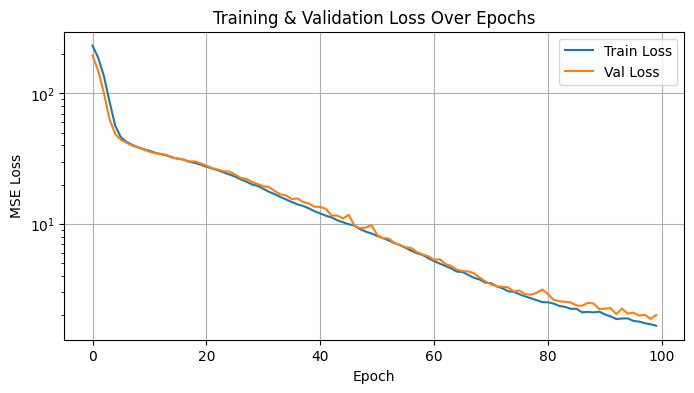

In [6]:
# Step 6: Plot Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Step 7: Predict on Training Data
y_pred = model.predict(X_train)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


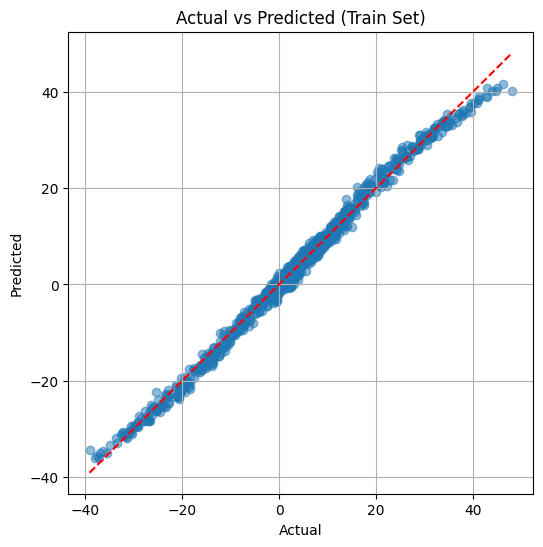

In [8]:
# Step 8: Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Train Set)")
plt.grid(True)
plt.show()


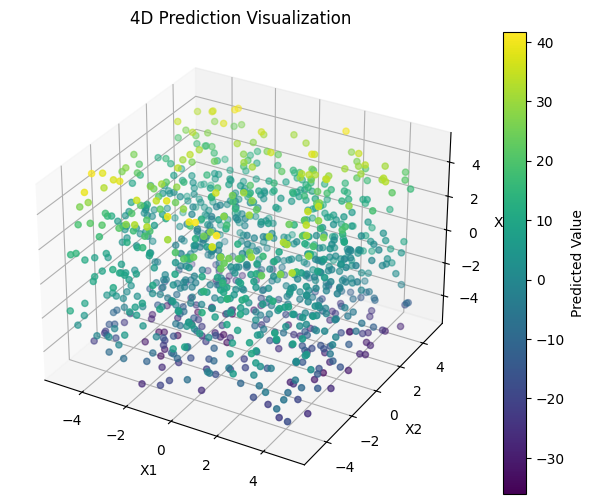

In [9]:
# Step 9: 4D Visualization of Predictions
def plot_4d_predictions(X, y_pred):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred[:, 0], cmap='viridis')
    plt.colorbar(sc, label='Predicted Value')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title("4D Prediction Visualization")
    plt.show()

plot_4d_predictions(X_train, y_pred)

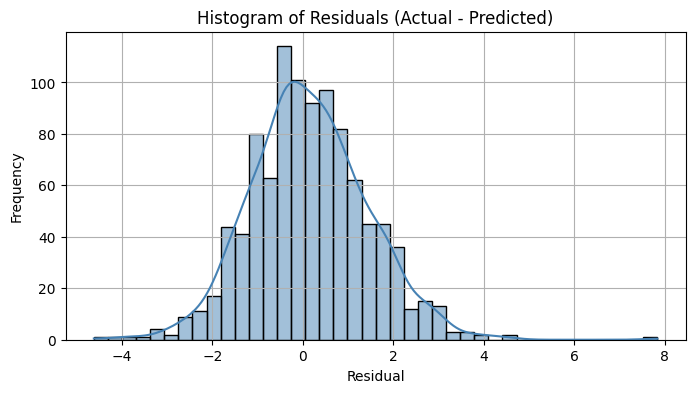

In [10]:
# Step 10: Residual Plot
residuals = (y_train - y_pred).flatten()
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=40, kde=True, color='steelblue')
plt.title("Histogram of Residuals (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [11]:
# Step 11: Custom Predictions
def predict_custom(model, x1, x2, x3):
    sample = np.array([[x1, x2, x3]], dtype=np.float32)
    return model.predict(sample)[0][0]

test_points = [(-4, -4, -4), (0, 0, 0), (4, 4, 4)]

print("\nSample Test Predictions:")
for x1, x2, x3 in test_points:
    pred = predict_custom(model, x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3}) → Predicted: {pred:.3f}, Actual: {actual:.3f}")


Sample Test Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Input: (-4, -4, -4) → Predicted: -10.203, Actual: -10.644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Input: (0, 0, 0) → Predicted: -0.987, Actual: 1.000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Input: (4, 4, 4) → Predicted: 25.935, Actual: 24.729
